# Introduction
Matplotlib is the most popular plotting library in python. Using matplotlib, we can create pretty much any type of plot. However, as the plots get more complex, the learning curve can get steeper.

The goal of this tutorial is to make us understand ‘how plotting with matplotlib works’ and get us comfortable building full-featured plots with matplotlib.

# A Basic Scatterplot
The following piece of code is found in pretty much any python code that has matplotlib plots.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.pyplot is usually imported as plt. It is the core object that contains the methods to create all sorts of charts and features in a plot.

The %matplotlib inline is a jupyter notebook specific command that let’s we see the plots in the notbook itself.

Suppose we want to draw a specific type of plot, say a scatterplot, the first thing we want to check out are the methods under plt (type plt and hit tab or type dir(plt) in python prompt).

Let’s begin by making a simple but full-featured scatterplot and take it from there. Let’s see what plt.plot() creates if we pass it an arbitrary sequence of numbers.

In [2]:
# Switch the background to work with dark-themed Jupyter :) 
plt.style.use('dark_background')

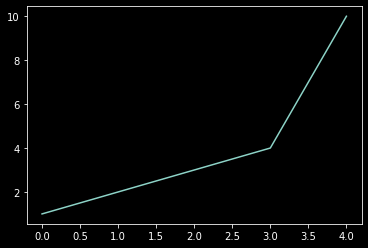

In [3]:
# Plot
plt.plot([1,2,3,4,10])

We just gave a list of numbers to plt.plot() and it drew a line chart automatically. 
It assumed the values of the X-axis start from zero and have as many ticks as items in the data

Notice the line matplotlib.lines.Line2D in code output?

That’s because Matplotlib returns the plot object itself as well as drawing the plot.

If we only want to see the plot, add plt.show() at the end and execute all the lines in one shot.

Ok so we should also notice that instead of the intended scatterplot, plt.plot drew a line plot. That’s because this is the default behaviour.

So how would we draw a scatterplot instead?

Well to do that, let’s understand a bit more about what arguments plt.plot() expects. The plt.plot() function accepts three basic arguments in the following order: (x, y, format).

The "format" argument is a short-hand combination of {color}{marker}{line}.

For example, the format 'go-' has three characters standing for: ‘green colored dots with solid line’. By omitting the line part (‘-‘) at the end we will be left with only green dots (‘go’), which should draw a scatterplot.

Some commonly used short-hand format examples are:
* 'r*--' : ‘red stars with dashed lines’
* 'ks.' : ‘black squares with dotted line’ (‘k’ stands for black)
* 'bD-.' : ‘blue diamonds with dash-dot line’.

For a complete list of colors, markers and linestyles, check out the help(plt.plot) command.

Let’s draw a scatterplot with green dots.

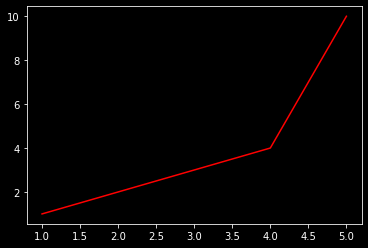

In [4]:
# 'go' stands for green dots
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'r-')
plt.show()

# How to draw two sets of scatterplots in same plot
Good. Now how do we plot another set of five points with a different color in the same figure?

Simply call plt.plot() again, it will add those points to the same figure.

Why does it not draw these points in a new panel? 
We will see this in the next section.

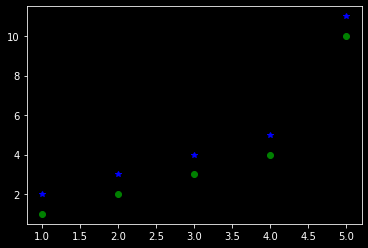

In [5]:
# Draw two sets of points
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # green dots
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # blue stars
plt.show()

Looks good. Now let’s add the basic plot features: Title, Legend, X and Y axis labels. 

How?

The plt object has corresponding methods to add each.

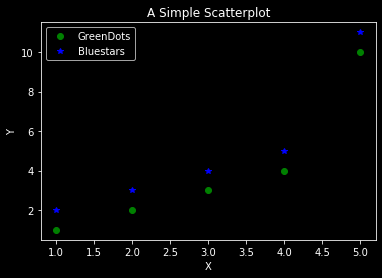

In [6]:
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go', label='GreenDots')
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*', label='Bluestars')
plt.title('A Simple Scatterplot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')  # legend text comes from the plot's label parameter.
plt.show()

Good, but the plot is a little hard to see -  how do we increase the size of the plot? 

The easiest way to do this is by setting the "figsize" argument inside plt.figure() method.


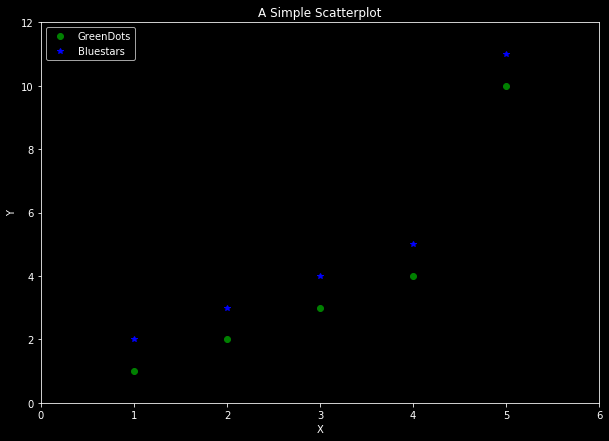

In [7]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go', label='GreenDots')  # green dots
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*', label='Bluestars')  # blue stars
plt.title('A Simple Scatterplot')  
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 6) # Sets the x-axis limits to be the range (0,6) 
plt.ylim(0, 12) # Sets the y-axis limits to be the range (0,12) 
plt.legend(loc='best')
plt.show()

Ok, we have some new lines of code in this. What does plt.figure() do?

Well, every plot that matplotlib makes is drawn on something called 'figure'. You can think of the figure object as a canvas that holds all the subplots and other plot elements inside it.

A figure object can have one or more subplots inside it called axes, arranged in rows and columns. 
Every figure has at least one axis. 

(Don’t confuse this axis with X and Y axes, they are different.)

# How to draw two scatterplots in different panels
Let’s understand the figure object and its axes in a little more detail.

Suppose we want to draw our two sets of points (green rounds and blue stars) in two separate plots side-by-side instead of the same plot. How would we do that?

To  do that we can create two separate subplots (axes) using plt.subplots(1, 2). This creates and returns two objects:
* the figure
* the axes (subplots) inside the figure:

<img src = "./assets/2Scatterplots.png" style="height:300px">

Previously, we called plt.plot() to draw the points. Since there was only one axis by default, it drew the points on that axis.
But now, since we want the points drawn on different subplots (axes), we have to call the plot function in the respective axes (ax1 and ax2 in the below code) instead of just plt.

Notice in the below code, we call ax1.plot() and ax2.plot() instead of calling plt.plot() twice.

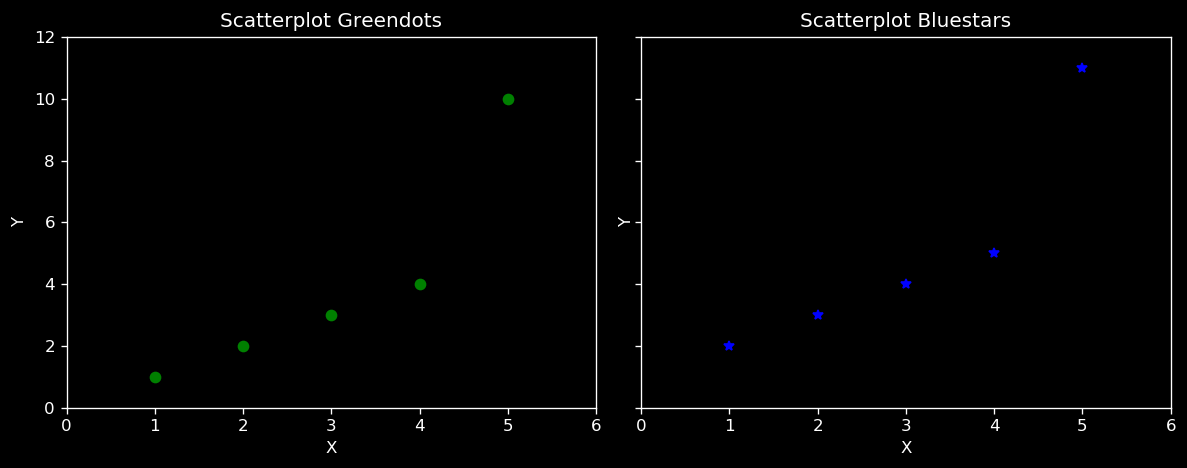

In [8]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # greendots
ax2.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Scatterplot Greendots'); ax2.set_title('Scatterplot Bluestars')
ax1.set_xlabel('X');  ax2.set_xlabel('X')  # x label
ax1.set_ylabel('Y');  ax2.set_ylabel('Y')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

plt.tight_layout() #tight_lawet automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

Setting sharey=True in plt.subplots() shares the Y axis between the two subplots.

And dpi=120 increased the number of dots per inch of the plot to make it sharper. You will notice an improvement in clarity on increasing the dpi argument.

This may seem like a lot of functions to learn but there is an easy way to remember this.

The ax1 and ax2 objects, like plt, have equivalent set_title, set_xlabel and set_ylabel functions. In fact, the plt.title() actually calls the current axes set_title() to do its job.
<ul>
    <li>plt.xlabel() → ax.set_xlabel()</li>
    <li>plt.ylabel() → ax.set_ylabel() </li>
    <li>plt.xlim() → ax.set_xlim() </li>
    <li>plt.ylim() → ax.set_ylim() </li>
    <li>plt.title() → ax.set_title() </li>
</ul>
Alternatively, to save code, we can set multiple items at once using ax.set(). </li>

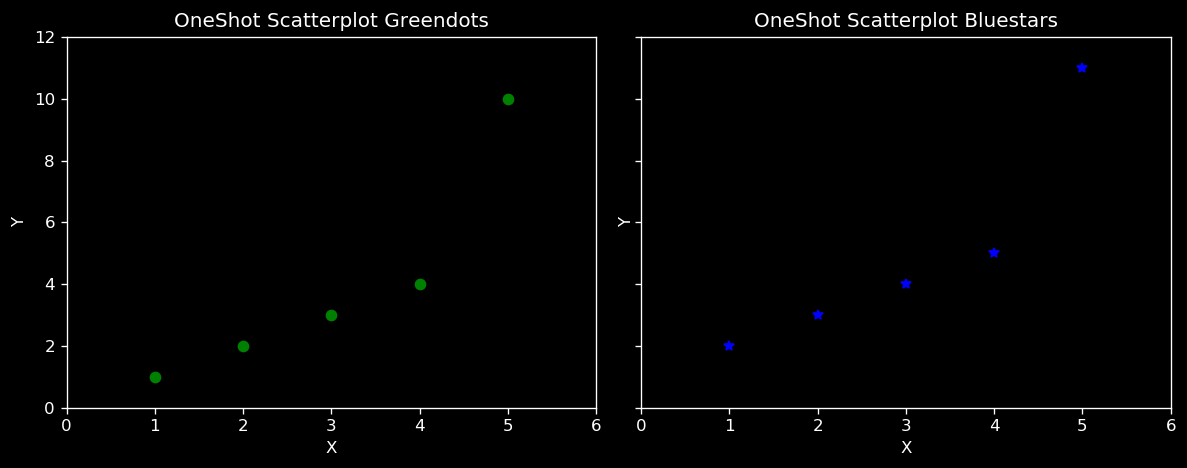

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)
# Plot
ax1.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # greendots
ax2.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # bluestart

ax1.set(title='OneShot Scatterplot Greendots', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))
ax2.set(title='OneShot Scatterplot Bluestars', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))

plt.tight_layout()
plt.show()

# Object Oriented Syntax vs Matlab like Syntax
A known ‘problem’ with learning matplotlib is, it has two coding interfaces:

Matlab like syntax and object oriented syntax.
This is partly the reason why matplotlib doesn’t have one consistent way of achieving the same given output, making it  difficult to understand for newcomers.

The syntax we have used so far is the Object-oriented syntax, which I personally prefer as it is more intuitive and pythonic to work with.

However, since the original purpose of matplotlib was to recreate the plotting facilities of matlab in python, the matlab-like-syntax is retained and still works.

The matlab syntax is ‘stateful’.

That means, the plt keeps track of what the current axes is. So whatever we draw with plt.{anything} will reflect only on the current subplot.

Practically speaking, the main difference between the two syntaxes is, in matlab-like syntax, all plotting is done using plt methods instead of the respective axes‘s method as in object oriented syntax.

So, how do we recreate the above multi-subplots figure (or any other figure for that matter) using matlab-like syntax?

The general procedure is: You manually create one subplot at a time (using plt.subplot() or plt.add_subplot()) and immediately call plt.plot() or plt.{anything} to modify that specific subplot (axes). Whatever method we call using plt will be drawn in the current axes.

The code below shows this in practice.

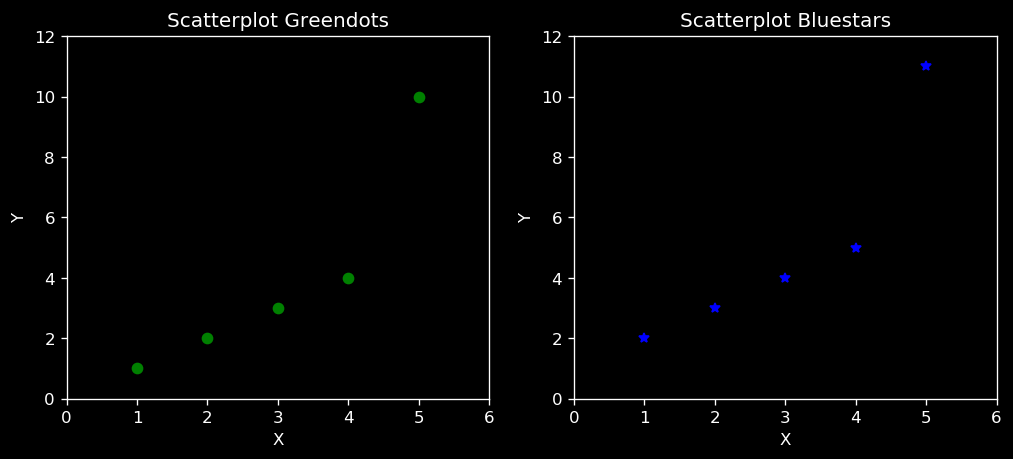

In [10]:
plt.figure(figsize=(10,4), dpi=120) # 10 is width, 4 is height

# Left hand side plot
plt.subplot(1,2,1)  # (nRows, nColumns, axes number to plot)
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # green dots
plt.title('Scatterplot Greendots')  
plt.xlabel('X'); plt.ylabel('Y')
plt.xlim(0, 6); plt.ylim(0, 12)

# Right hand side plot
plt.subplot(1,2,2)
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # blue stars
plt.title('Scatterplot Bluestars')  
plt.xlabel('X'); plt.ylabel('Y')
plt.xlim(0, 6); plt.ylim(0, 12)
plt.show()


Let’s break down the above piece of code.

In plt.subplot(1,2,1), the first two values, that is (1,2) specify the number of rows (1) and columns (2) and the third parameter (1) specifies the position of current subplot. The subsequent plt functions, will always draw on this current subplot.

We can get a reference to the current (subplot) axis with plt.gca() and the current figure with plt.gcf(). Likewise, plt.cla() and plt.clf() will clear the current axis and figure respectively.

Compare the above code with the object oriented (OO) version. The OO version might look a bit more confusing because it has a mix of both ax and plt commands.

However, there is a significant advantage with the oo approach. Since plt.subplots() returns all the axes as separate objects, we can avoid writing repetitive code by looping through the axes.

Always remember: plt.plot() or plt.{anything} will always act on the plot in the current axes, whereas, ax.{anything} will modify the plot inside that specific ax.

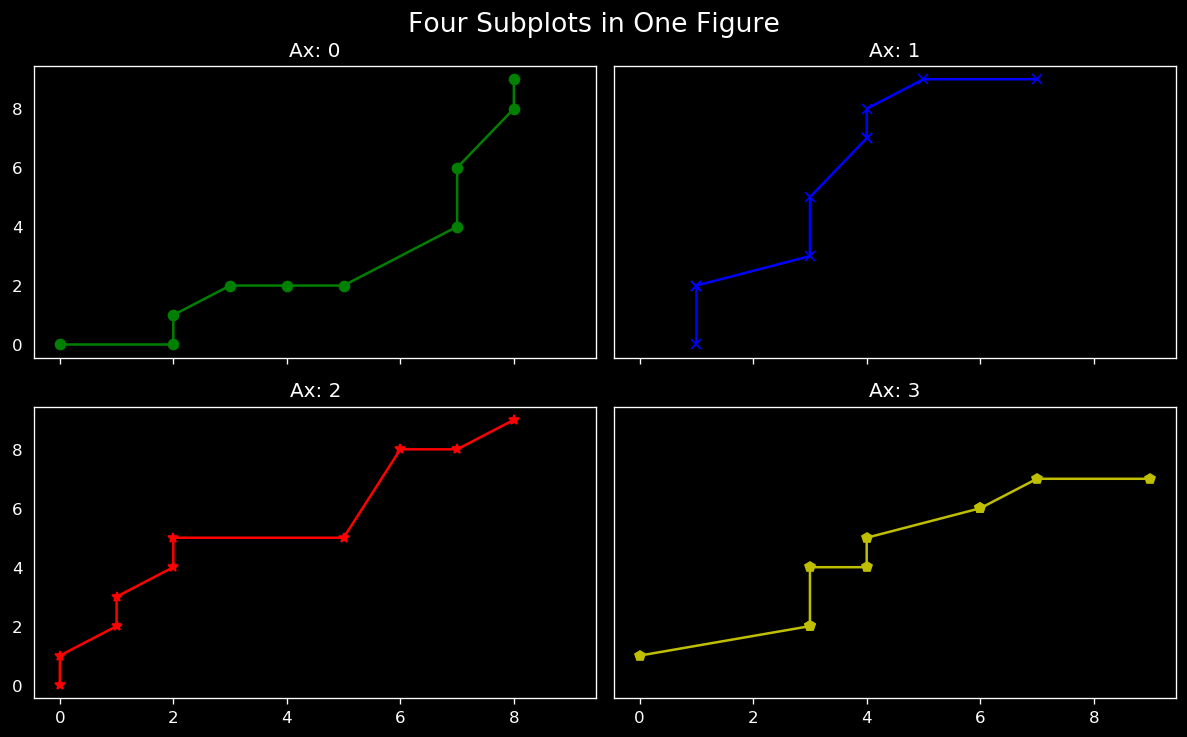

In [11]:
# Draw multiple plots using for-loops using object oriented syntax
import numpy as np
from numpy.random import seed, randint
seed(100)

# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    
plt.tight_layout() 
plt.show()

Did we notice in above plot, the Y-axis does not have ticks?

That’s because of the use of: ax.yaxis.set_ticks_position('none') to turn off the Y-axis ticks. This is another advantage of the object-oriented interface. You can actually get a reference to any specific element of the plot and use its methods to manipulate it.

Can we guess how to turn off the X-axis ticks?

The plt.suptitle() added a main title at figure level title. plt.title() would have done the same for the current subplot (axes).

The verticalalignment='bottom' parameter denotes that the hingepoint should be at the bottom of the title text, so that the main title is pushed slightly upwards.

Ok we have so far learned the core parts of how to create a plot and manipulate them using matplotlib. Next, let’s see how to get the reference to and modify the other components of the plot.

# How to Modify the Axis Ticks Positions and Labels
There are 3 basic things we will likely need in matplotlib when it comes to manipulating axis ticks:
1. How to control the position and tick labels? (using plt.xticks() or ax.setxticks() and ax.setxticklabels())
2. How to control which axis’s ticks (top/bottom/left/right) should be displayed (using plt.tick_params())
3. Functional formatting of tick labels

If we are using ax syntax, we can use ax.set_xticks() and ax.set_xticklabels() to set the positions and label texts respectively. If we are using the plt syntax, we can set both the positions as well as the label text in one call using the plt.xticks().

Actually, looking at the code of the plt.xticks() method (by typing ??plt.xticks in jupyter notebook), it calls ax.set_xticks() and ax.set_xticklabels() to do the job. plt.xticks takes the ticks and labels as required parameters but we can also adjust the label’s fontsize, rotation, ‘horizontalalignment’ and ‘verticalalignment’ of the hinge points on the labels, like I’ve done in the below example.

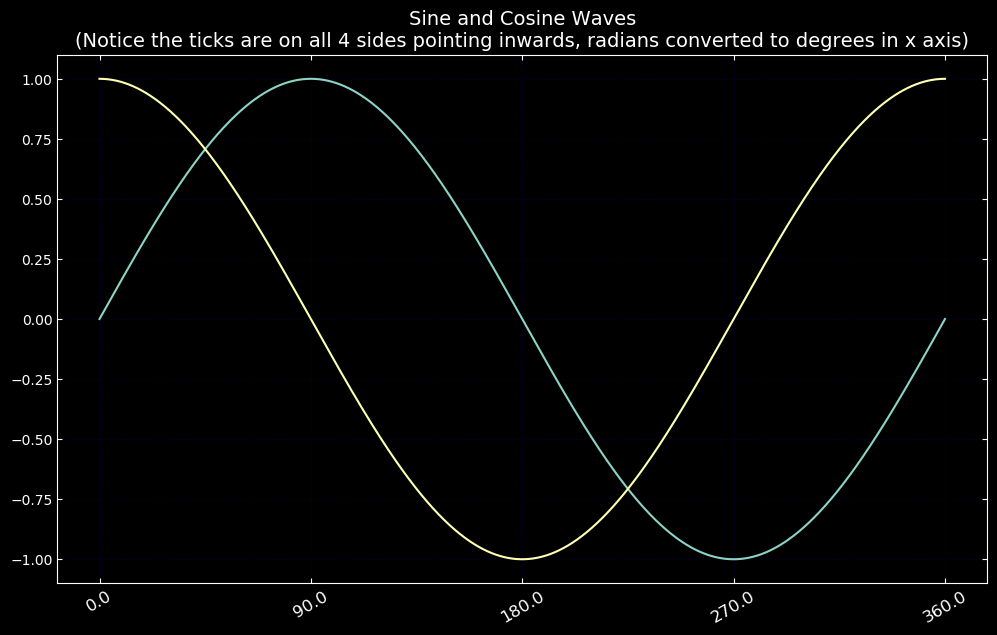

In [12]:
from matplotlib.ticker import FuncFormatter

def rad_to_degrees(x, pos):
    'converts radians to degrees'
    return round(x * 57.2985, 2)

plt.figure(figsize=(12,7), dpi=100)
X = np.linspace(0,2*np.pi,1000)
plt.plot(X,np.sin(X))
plt.plot(X,np.cos(X))

# 1. Adjust x axis Ticks
plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.title('Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)', fontsize=14)
plt.show()

In above code, plt.tick_params() is used to determine which all axis of the plot (‘top’ / ‘bottom’ / ‘left’ / ‘right’) we want to draw the ticks and which direction (‘in’ / ‘out’) the tick should point to.

the matplotlib.ticker module provides the FuncFormatter to determine how the final tick label should be shown.

# Understanding the rcParams, Colors and Plot Styles
The look and feel of various components of a matplotlib plot can be set globally using rcParams. 
The complete list of rcParams can be viewed and we can adjust the paramater we’d like to change by updating it.


In [13]:
import matplotlib as mpl
mpl.rc_params()


/Users/davidboland/anaconda3/lib/python3.7/site-packages/IPython/lib/pretty.py:697: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

The below snippet adjusts the font by setting it to ‘stix’, which looks great on plots by the way.

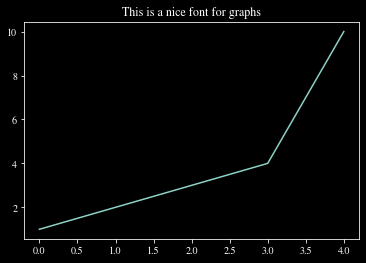

In [14]:
mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.plot([1,2,3,4,10])
plt.title("This is a nice font for graphs");

After modifying a plot, we can rollback the rcParams to default setting using:

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

Matplotlib comes with pre-built styles which we can look by typing plt.style.available (I am using the 'dark_background' style for this notebook).

In [16]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

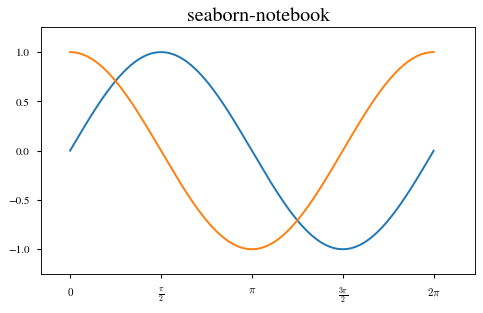

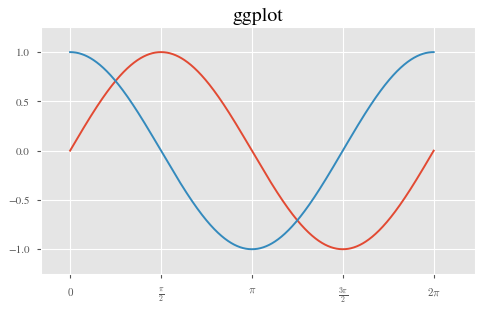

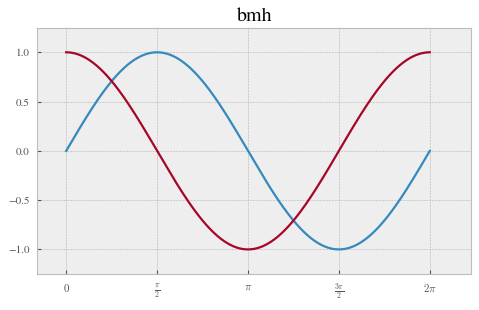

In [17]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

def plot_sine_cosine_wave(style='ggplot'):
    plt.style.use(style)
    plt.figure(figsize=(7,4), dpi=80)
    X = np.linspace(0,2*np.pi,1000)
    plt.plot(X,np.sin(X)); plt.plot(X,np.cos(X))
    plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), labels = [r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])  # 1 radian = 57.2985 degrees
    plt.gca().set(ylim=(-1.25, 1.25), xlim=(-.5, 7))
    plt.title(style, fontsize=18)
    plt.show()

plot_sine_cosine_wave('seaborn-notebook')    
plot_sine_cosine_wave('ggplot')    
plot_sine_cosine_wave('bmh')    

I have just shown a few of the pre-built styles, the rest of the list is definitely worth a look.

Matplotlib also comes with pre-built colors and palettes. Type the following in the jupyter/python console to check out the available colors.

In [18]:
# View Colors
mpl.colors.CSS4_COLORS  # 148 colors
mpl.colors.XKCD_COLORS  # 949 colors
mpl.colors.BASE_COLORS  # 8 colors


{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

In [19]:
#View first 10 Palettes
dir(plt.cm)[:10]

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r']

<img src = "./assets/matplotlib_colors.png">

# How to Customise the Legend
The most common way to make a legend is to define the label parameter for each of the plots and finally call plt.legend().

However, sometimes we might want to construct the legend on its own. In that case, we need to pass the plot items for which we want to draw the legend  and the legend text as parameters to plt.legend() in the following format:

plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))

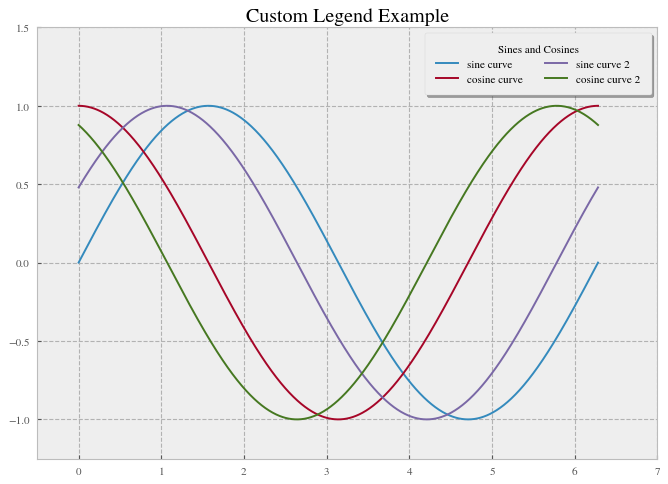

In [20]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,7), dpi=80)
X = np.linspace(0, 2*np.pi, 1000) #linspace returns evenly spaced numbers over a specified interval
sine = plt.plot(X,np.sin(X)); cosine = plt.plot(X,np.cos(X))
sine_2 = plt.plot(X,np.sin(X+.5)); cosine_2 = plt.plot(X,np.cos(X+.5))
plt.gca().set(ylim=(-1.25, 1.5), xlim=(-.5, 7))
plt.title('Custom Legend Example', fontsize=18)

# Modify legend
plt.legend([sine[0], cosine[0], sine_2[0], cosine_2[0]],   # plot items
           ['sine curve', 'cosine curve', 'sine curve 2', 'cosine curve 2'],  
           frameon=True,                                   # legend border
           framealpha=1,                                   # transparency of border
           ncol=2,                                         # num columns
           shadow=True,                                    # shadow on
           borderpad=1,                                    # thickness of border
           title='Sines and Cosines')                      # title
plt.show()

# How to Add Text, Arrows and Annotations
plt.text and plt.annotate add texts and annotations respectively. If we have to plot multiple texts we need to call plt.text() multiple times, typically in a for-loop.

Let’s annotate the peaks and troughs adding arrowprops and a bbox for the text.

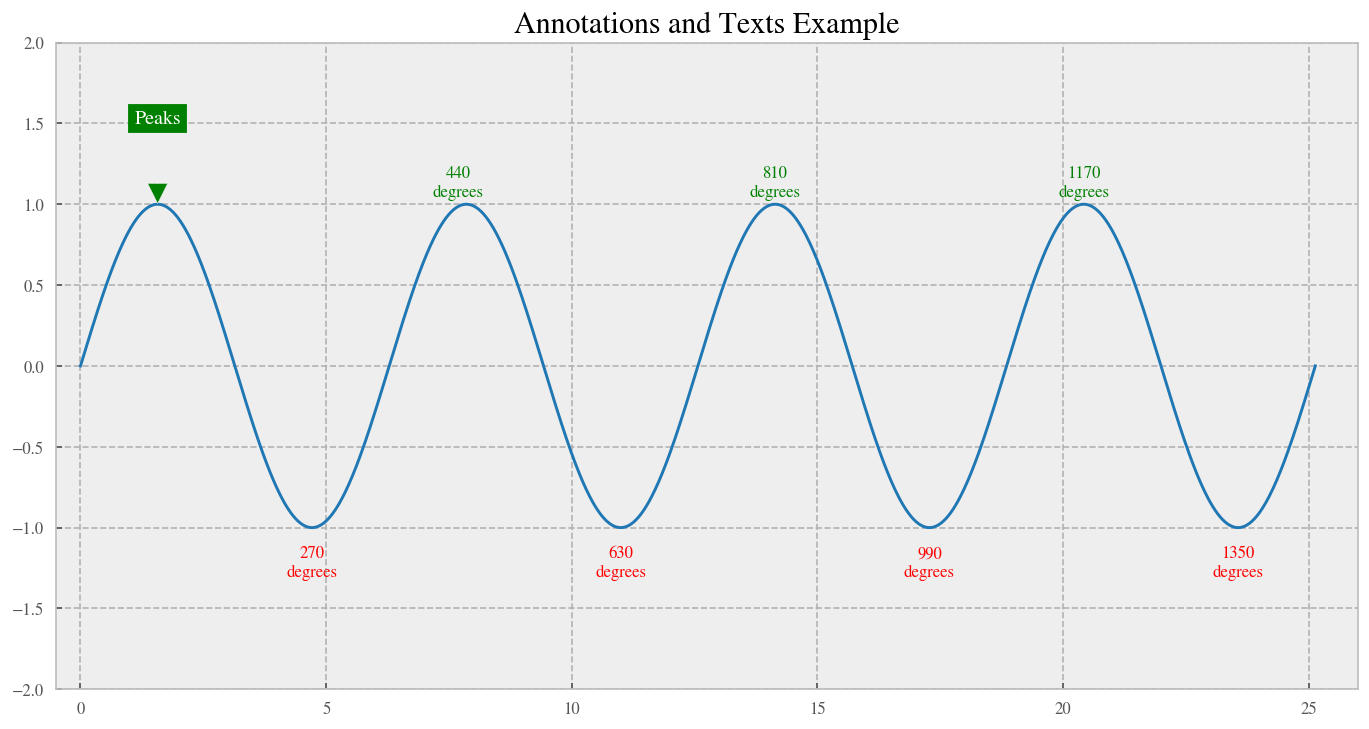

In [21]:
# Texts, Arrows and Annotations Example
# ref: https://matplotlib.org/users/annotations_guide.html
plt.figure(figsize=(14,7), dpi=120)
X = np.linspace(0, 8*np.pi, 1000)
sine = plt.plot(X,np.sin(X), color='tab:blue');

# 1. Annotate with Arrow Props and bbox
plt.annotate('Peaks', xy=(90/57.2985, 1.0), xytext=(90/57.2985, 1.5),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# 2. Texts at Peaks and Troughs
for angle in [440, 810, 1170]:
    plt.text(angle/57.2985, 1.05, str(angle) + "\ndegrees", transform=plt.gca().transData, horizontalalignment='center', color='green')

for angle in [270, 630, 990, 1350]:
    plt.text(angle/57.2985, -1.3, str(angle) + "\ndegrees", transform=plt.gca().transData, horizontalalignment='center', color='red')    

plt.gca().set(ylim=(-2.0, 2.0), xlim=(-.5, 26))
plt.title('Annotations and Texts Example', fontsize=18)
plt.show()

Notice, all the text we plotted above was in relation to the data.

That is, the x and y position in the plt.text() corresponds to the values along the x and y axes. However, sometimes we might work with data of different scales on different subplots and we want to write the text in the same position on all the subplots.

In this case, instead of manually computing the x and y positions for each axis, we can specify the x and y values in relation to the axes (instead of x and y axis values).

We can do this by setting transform=ax.transData.

The lower left corner of the axes has (x,y) = (0,0) and the top right corner will correspond to (1,1).

The below plot shows the positioning of text for the same values of (x,y) = (0.50, 0.02) with respect to the Data(transData), Axes(transAxes) and Figure(transFigure) respectively.

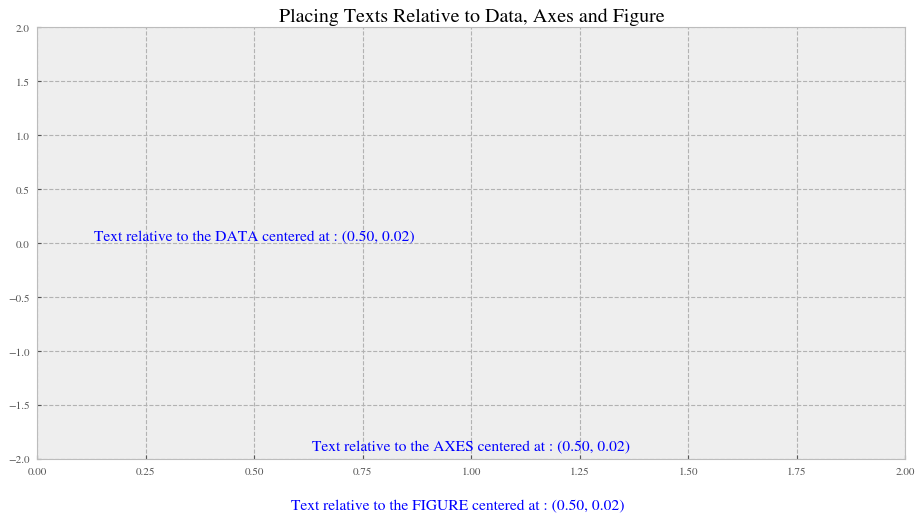

In [22]:
# Texts, Arrows and Annotations Example
plt.figure(figsize=(14,7), dpi=80)
X = np.linspace(0, 8*np.pi, 1000)

# Text Relative to DATA
plt.text(0.50, 0.02, "Text relative to the DATA centered at : (0.50, 0.02)", transform=plt.gca().transData, fontsize=14, ha='center', color='blue')

# Text Relative to AXES
plt.text(0.50, 0.02, "Text relative to the AXES centered at : (0.50, 0.02)", transform=plt.gca().transAxes, fontsize=14, ha='center', color='blue')

# Text Relative to FIGURE
plt.text(0.50, 0.02, "Text relative to the FIGURE centered at : (0.50, 0.02)", transform=plt.gcf().transFigure, fontsize=14, ha='center', color='blue')

plt.gca().set(ylim=(-2.0, 2.0), xlim=(0, 2))
plt.title('Placing Texts Relative to Data, Axes and Figure', fontsize=18)
plt.show()

# How to customise matplotlib’s subplots layout
Matplotlib provides two convenient ways to create customised multi-subplots layout.
<ul>
    <li> plt.subplot2grid </li>
    <li> plt.GridSpec </li>
</ul>
Both plt.subplot2grid and plt.GridSpec let us draw complex layouts. 
Below is a plt.subplot2grid example.

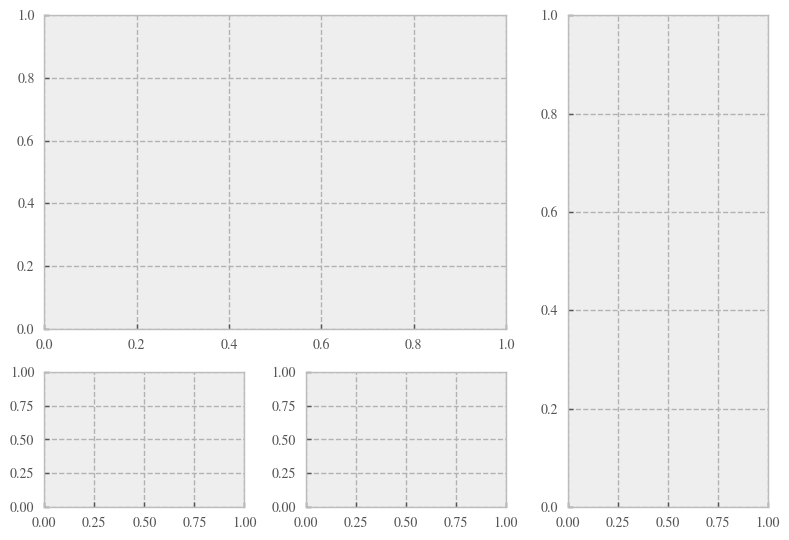

In [23]:
# Supplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)            # right
ax4 = plt.subplot2grid((3,3), (2,0))                       # bottom left
ax5 = plt.subplot2grid((3,3), (2,1))                       # bottom right
fig.tight_layout()

Using plt.GridSpec, we can use either a plt.subplot() interface which takes part of the grid specified by plt.GridSpec(nrow, ncol) or use the ax = fig.add_subplot(g) where the GridSpec is defined by height_ratios and weight_ratios.

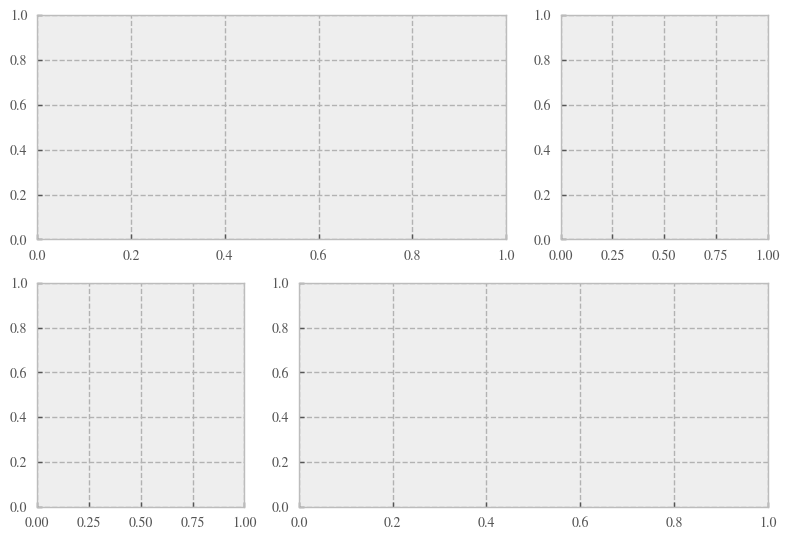

In [24]:
# GridSpec Approach 1
import matplotlib.gridspec as gridspec
fig = plt.figure()
grid = plt.GridSpec(2, 3)  # 2 rows 3 cols
plt.subplot(grid[0, :2])  # top left
plt.subplot(grid[0, 2])   # top right
plt.subplot(grid[1, :1])  # bottom left
plt.subplot(grid[1, 1:])  # bottom right
fig.tight_layout()

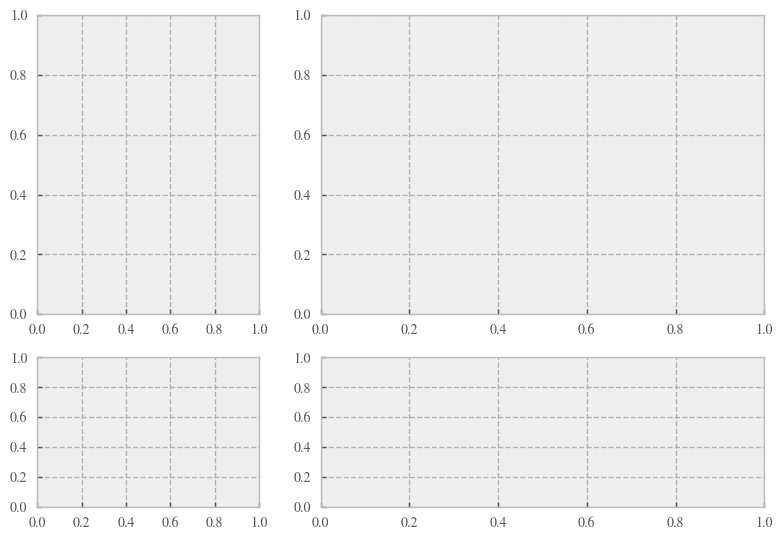

In [25]:
# GridSpec Approach 2
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(2, 2, height_ratios=[2,1], width_ratios=[1,2])
for g in gs:
    ax = fig.add_subplot(g)    
fig.tight_layout()

The above examples showed layouts where the subplots dont overlap. It is possible to make subplots overlap. In fact we can draw an axes inside a larger axes using fig.add_axes(). We need to specify the x,y positions relative to the figure and also the width and height of the inner plot.

Below is an example of an inner plot that zooms in to a larger plot.

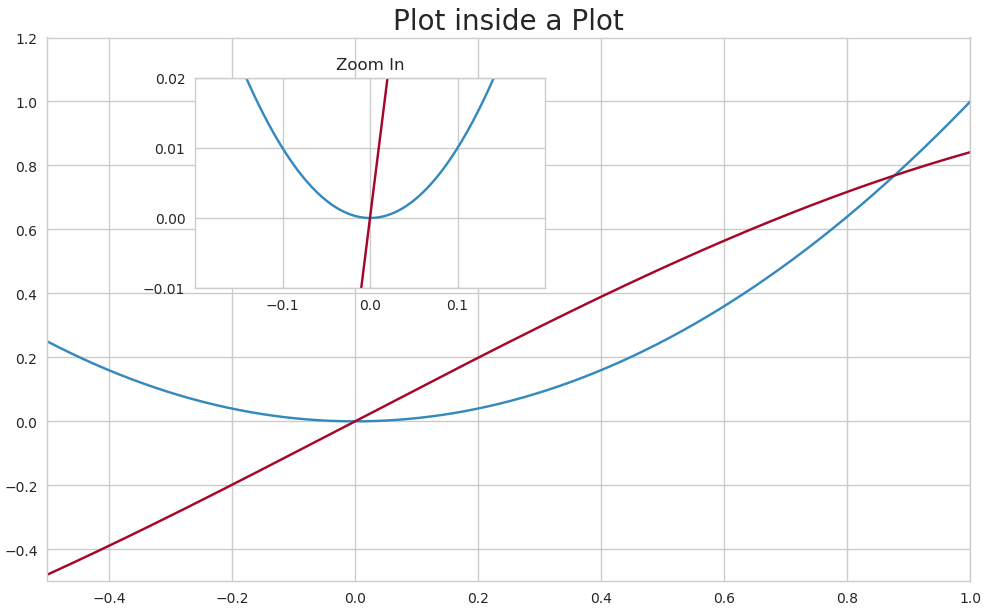

In [26]:
# Plot inside a plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5,1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1,0,.1])
ax.set_title("Plot inside a Plot", fontsize=20)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

# How is a scatterplot drawn with plt.plot different from plt.scatter ?
The difference is that plt.plot() does not provide options to change the colour and size of point dynamically (based on another array). But plt.scatter() allows us to do this.

By varying the size and colour of points, we can create nice looking bubble plots.

Another convenience is we can directly use a pandas dataframe to set the x and y values, provided we specify the source dataframe in the data argument.

You can also set the colour 'c' and size 's' of the points from one of the dataframe columns.

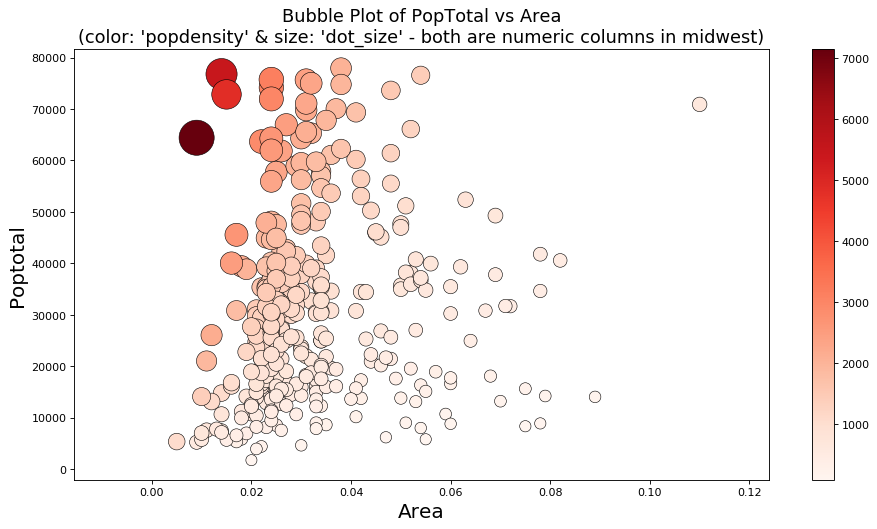

In [27]:
# Scatterplot with varying size and color of points
import pandas as pd
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
# Note that this reads the csv directly from a website location

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show()     

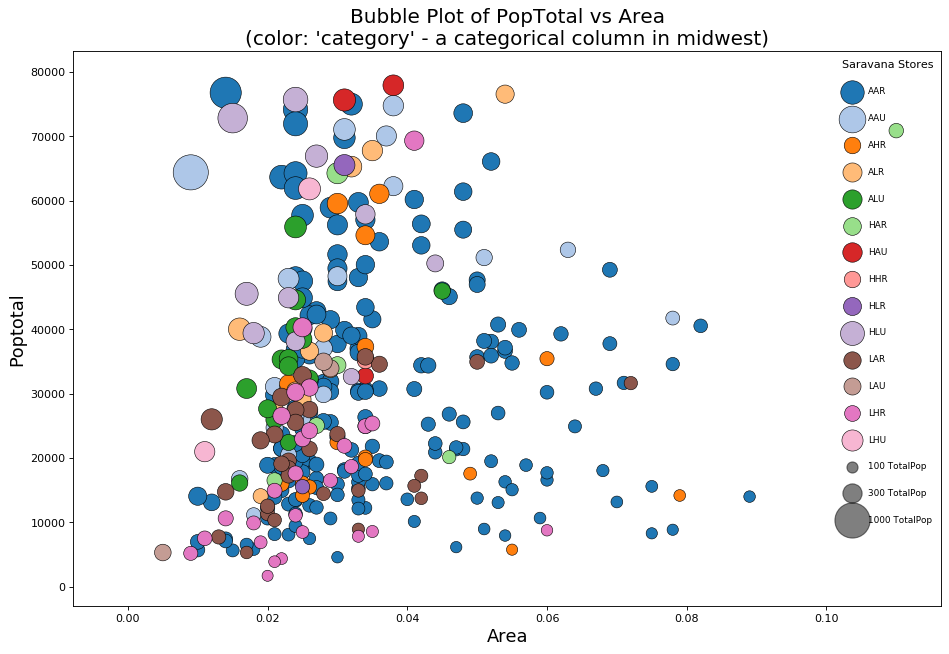

In [28]:
# Import data
import pandas as pd
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 9), dpi= 80, facecolor='w', edgecolor='k')    
colors = plt.cm.tab20.colors
categories = np.unique(midwest['category'])
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', color=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Legend for size of points
for dot_size in [100, 300, 1000]:
    plt.scatter([], [], color='k', alpha=0.5, s=dot_size, label=str(dot_size) + ' TotalPop')
plt.legend(loc='upper right', scatterpoints=1, frameon=False, labelspacing=2, title='Saravana Stores', fontsize=8)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'category' - a categorical column in midwest)", fontsize=18)
plt.xlabel('Area', fontsize=16)
plt.ylabel('Poptotal', fontsize=16)
plt.show()

We can save plots for use in later documents or work. 

In [29]:
# Save the figure
plt.savefig("bubbleplot.png", transparent=True, dpi=120)

<Figure size 640x480 with 0 Axes>

# How to draw Histograms, Boxplots and Time Series
The methods to draw different types of plots are present in pyplot (plt) as well as Axes. 

The below code shows basic examples of a few of the commonly used plot types.

/Users/davidboland/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


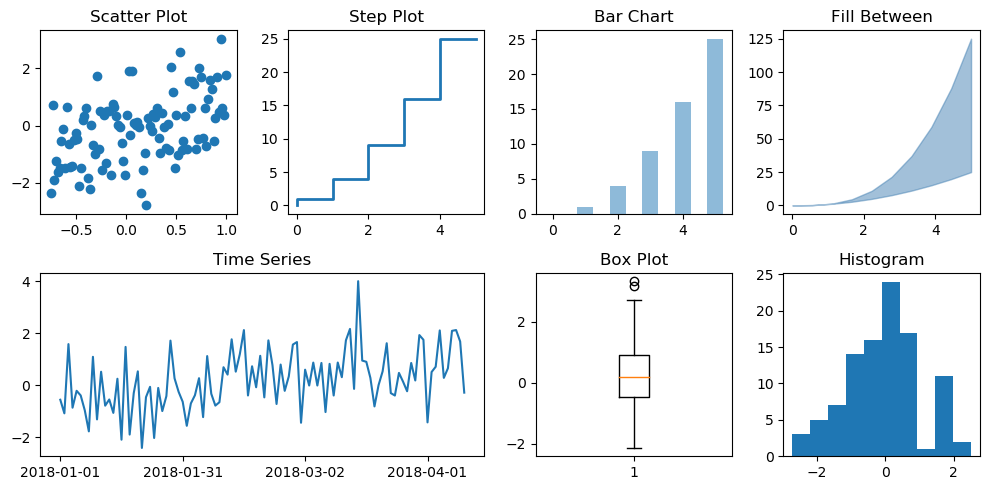

In [30]:
import pandas as pd

# Setup the subplot2grid Lawet
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()
fig.show()

# How to Plot with two Y-Axes
Plotting a line chart on the left-hand side axis is straightforward, which we’ve already seen.

So how can we draw a second line on the right-hand side y-axis?

The trick is to activate the right hand side Y axis using ax.twinx() to create a second axes.

This second axes will have the Y-axis on the right activated and shares the same x-axis as the original ax. Then, whatever we draw using this second axis will be referenced to the secondary y-axis. It remains to just colour the axes and tick labels to match the colour of the lines.

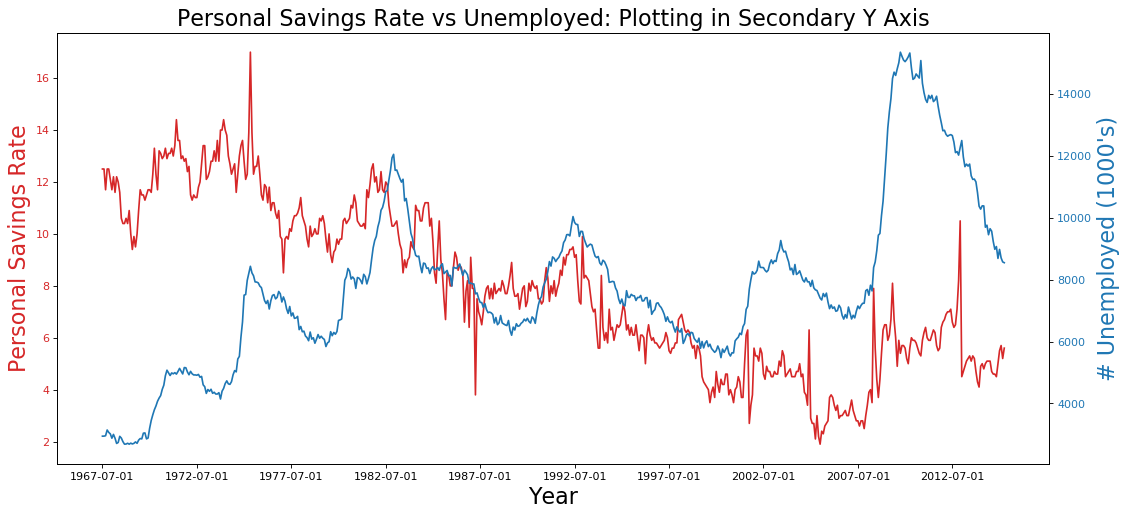

In [31]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
x = df['date']; y1 = df['psavert']; y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,7), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Just Decorations!! -------------------
# ax1 (left y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=20)
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
plt.show()

# Introduction to Seaborn
As the charts get more complex, the more the code we’ve got to write. For example, in matplotlib, there is no direct method to draw a density plot of a scatterplot with line of best fit. You get the idea.

So, what we can do instead is to use a higher level package like seaborn, and use one of its prebuilt functions to draw the plot.

We are not going in-depth into seaborn. But let’s see how to get started and where to find what we want. A lot of seaborn’s plots are suitable for data analysis and the library works seamlessly with pandas dataframes.

seaborn is typically imported as sns. Like matplotlib it comes with its own set of pre-built styles and palettes.

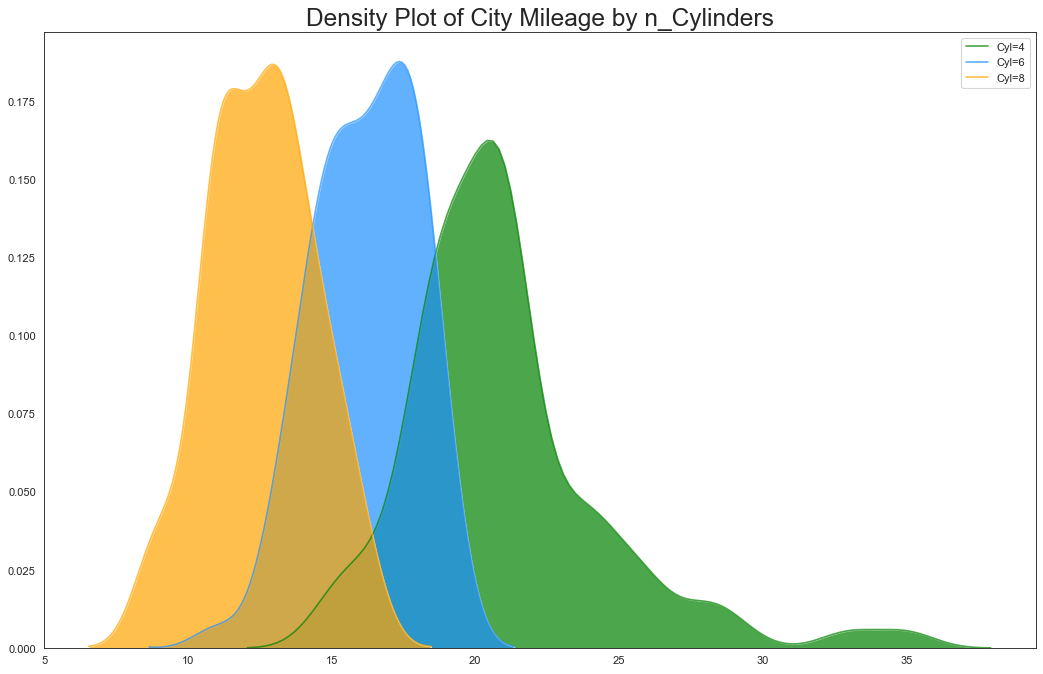

In [32]:
import seaborn as sns
sns.set_style("white")

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

<Figure size 800x640 with 0 Axes>

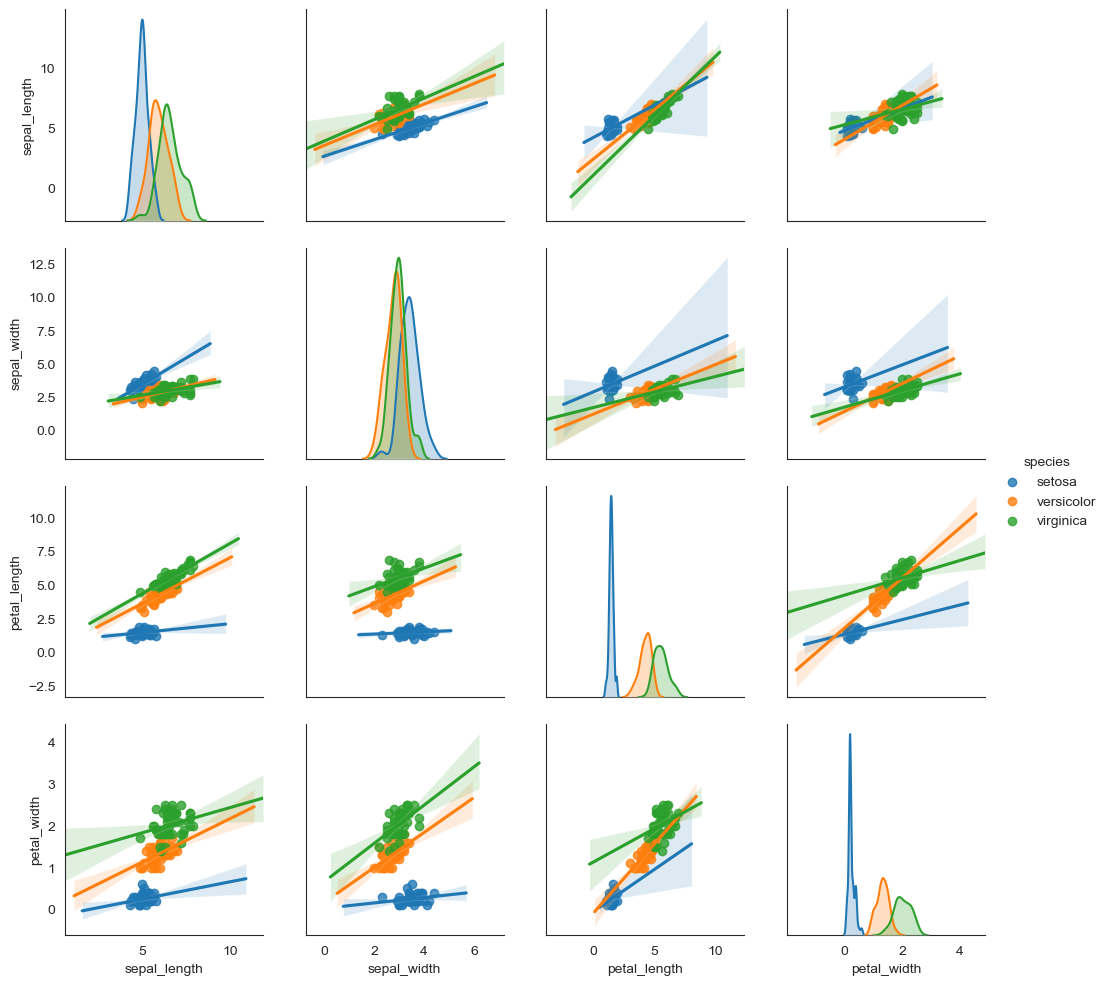

In [33]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show();

# Conclusion
Congratulations for gettting this far. We literally started from scratch and covered the essential topics to making matplotlib plots.

We covered the syntax and overall structure of creating matplotlib plots, saw how to modify various components of a plot, customised subplots layout, plot styling, colours, palettes, different plot types etc.

If you want to get more practice, try looking up a couple of the plots listed in the <a href = "https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/"> top 50 plots </a> starting with correlation plots and try recreating it.